In [1]:
# linear algebra
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = '/Users/lenkwok/Downloads/car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#The column names have to be renamed from numerical to categorical for more informative purpose

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [11]:
#check again dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

# View summary of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
# 7 variables, all categorical.  Class is target variable.

# Explore class variable

In [6]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [7]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Declare feature vectors and target variable

In [8]:
X=df.drop(['class'],axis=1)
y=df['class']

# Split data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

# Feature Engineering

In [12]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [ ]:
#We can see that all the variables are ordinal categorical data type.  

In [17]:
# import category encoders

import category_encoders as ce

In [18]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

In [19]:
X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)

In [21]:
X_train.head()


,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


In [22]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


# Decision Tree Classifier with criterion gini index 

In [ ]:
#Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points.

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.
It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. 
CART (Classification and Regression Tree) uses the Gini method to create binary splits.

In [23]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [24]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [25]:
#Fit model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
#Predict results
y_pred_gini=clf_gini.predict(X_test)

In [28]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8179


# Visualize decision-trees


[Text(446.40000000000003, 380.52, 'X[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(223.20000000000002, 163.07999999999998, 'X[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(111.60000000000001, 54.360000000000014, 'gini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(334.8, 54.360000000000014, 'gini = 0.634\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(446.40000000000003, 163.07999999999998, 'gini = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(558.0, 271.8, 'gini = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

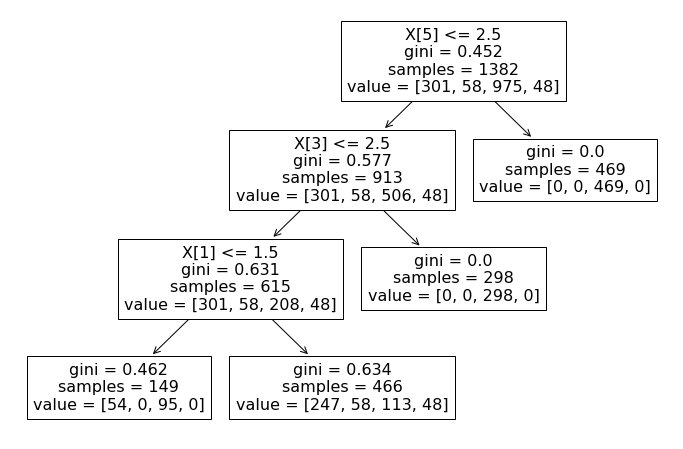

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

# Decision Tree Classifier with criterion entropy 

In [31]:
clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

In [32]:
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [34]:
#Predict Test set results with entropy criterion
y_pred_en=clf_en.predict(X_test)

In [35]:
#Check accuracy score with entropy criterion
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy index: 0.8179


# Visualize decision-trees


[Text(446.40000000000003, 380.52, 'X[5] <= 2.5\nentropy = 1.194\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(334.8, 271.8, 'X[3] <= 2.5\nentropy = 1.476\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(223.20000000000002, 163.07999999999998, 'X[1] <= 1.5\nentropy = 1.642\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(111.60000000000001, 54.360000000000014, 'entropy = 0.945\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(334.8, 54.360000000000014, 'entropy = 1.693\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(446.40000000000003, 163.07999999999998, 'entropy = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(558.0, 271.8, 'entropy = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

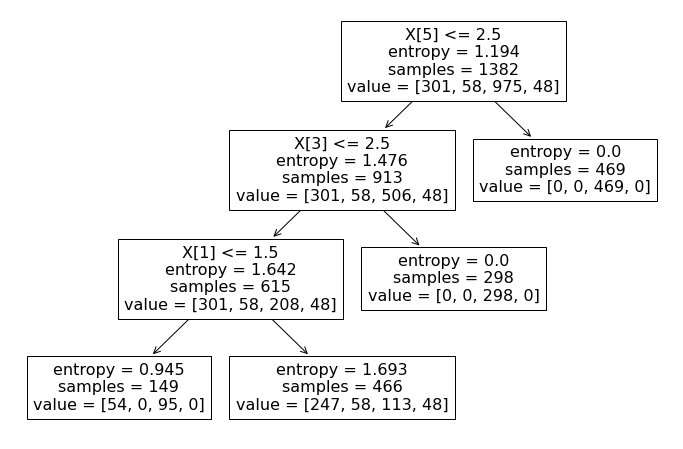

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

# Confusion matrix 

In [38]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix for gini\n\n', cm)

Confusion matrix for gini

 [[ 65   0  18   0]
 [ 11   0   0   0]
 [ 17   0 218   0]
 [ 17   0   0   0]]


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix for entropy\n\n', cm)

Confusion matrix

 [[ 65   0  18   0]
 [ 11   0   0   0]
 [ 17   0 218   0]
 [ 17   0   0   0]]


# Classification Report

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346



In [ ]:
#In this project, I built Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8179.